### Unveiling Trends in Renewable Energy

### Background 
The race to net-zero emissions is heating up. As nations work to combat climate change and meet rising energy demands, renewable energy has emerged as a cornerstone of the clean transition. Solar, wind, and hydro are revolutionizing how we power our lives. Some countries are leading the charge, while others are falling behind. But which nations are making the biggest impact? What’s driving their success? And what lessons can we learn to accelerate green energy transition?

As a data scientist at NextEra Energy, one of the world’s leading renewable energy providers, your role is to move beyond exploration, into prediction. Using a rich, real-world dataset, you’ll build models to forecast renewable energy production, drawing on indicators like GDP, population, carbon emissions, and policy metrics.

With the world watching, your model could help shape smarter investments, forward-thinking policies, and a faster transition to clean energy.

#### The data  

**Global renewable energy dataset** covering energy production, investments, policies, and economic factors shaping renewable adoption worldwide:  

**-Basic Identifiers:**    
- **`Country`** – Country name  
- **`Year`** – Calendar year (YYYY)  
- **`Energy Type`** – Type of renewable energy (e.g., Solar, Wind)  

**-Energy Metrics:** 
- **`Production (GWh)`** – Renewable energy produced (Gigawatt-hours)  
- **`Installed Capacity (MW)`** – Installed renewable capacity (Megawatts)  
- **`Investments (USD)`** – Total investment in renewables (US Dollars)  
- **`Energy Consumption (GWh)`** – Total national energy use  
- **`Energy Storage Capacity (MWh)`** – Capacity of energy storage systems  
- **`Grid Integration Capability (Index)`** – Scale of 0–1; ability to handle renewables in grid  
- **`Electricity Prices (USD/kWh)`** – Average cost of electricity  
- **`Energy Subsidies (USD)`** – Government subsidies for energy sector  
- **`Proportion of Energy from Renewables (%)`** – Share of renewables in total energy mix  

**-Innovation & Tech:**
- **`R&D Expenditure (USD)`** – R&D spending on renewables  
- **`Renewable Energy Patents`** – Number of patents filed  
- **`Innovation Index (Index)`** – Global innovation score (0–100)  

**-Economy & Policy:**
- **`GDP (USD)`** – Gross domestic product  
- **`Population`** – Total population  
- **`Government Policies`** – Number of policies supporting renewables  
- **`Renewable Energy Targets`** – Whether national targets are in place (1 = Yes, 0 = No)  
- **`Public-Private Partnerships in Energy`** – Number of active collaborations  
- **`Energy Market Liberalization (Index)`** – Scale of 0–1  

**-Social & Governance:**
- **`Ease of Doing Business (Score)`** – World Bank index (0–100)  
- **`Regulatory Quality`** – Governance score (-2.5 to 2.5)  
- **`Political Stability`** – Governance score (-2.5 to 2.5)  
- **`Control of Corruption`** – Governance score (-2.5 to 2.5)  

**-Environment & Resources:**  
- **`CO2 Emissions (MtCO2)`** – Emissions in million metric tons  
- **`Average Annual Temperature (°C)`** – Country’s avg. temp  
- **`Solar Irradiance (kWh/m²/day)`** – Solar energy availability  
- **`Wind Speed (m/s)`** – Average wind speed  
- **`Hydro Potential (Index)`** – Relative hydropower capability (0–1)  
- **`Biomass Availability (Tons/year)`** – Total available biomass  

**Challenge**

As a data scientist at NextEra Energy, your task is to use the **Training Set** (80% of the data) to train a powerful machine learning model that can predict **renewable energy production (GWh)**. Once your model is trained, you will use it to generate predictions for the **Test Set**, which does not include the target (`Production (GWh)`) but has an additional **`ID` column**.

**Your Task**

1. **Train Your Model**:

   * Use the **Training Set**, which contains all features and the target (`Production (GWh)`), to build and fine-tune your model.
   * Explore, clean, and transform the data as needed.

2. **Generate Predictions**:

   * Use your trained model to make predictions for the **Test Set (20%)**, which has all the features **except `Production (GWh)`**.
   * The Test Set also has an **`ID` column**, which uniquely identifies each row.



Your model won’t just generate predictions — it will uncover underlying drivers of renewable energy production and reveal where the biggest gains can be made!


In [82]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from xgboost import XGBRegressor

Load both the training and test datasets and print their shape.

In [83]:
path = os.getcwd()

train_df = pd.read_csv(path + '/Training_set_augmented.csv')
test_df = pd.read_csv(path + '/Public_Test_Set.csv')

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape} \n")

Training data shape: (2400, 31)
Test data shape: (600, 31) 



Let's take a first look of the data to understand its structure, columns, content and data types.

In [84]:
train_df.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Energy Consumption,Energy Storage Capacity,Grid Integration Capability,Electricity Prices,...,Ease of Doing Business,Regulatory Quality,Political Stability,Control of Corruption,CO2 Emissions,Average Annual Temperature,Solar Irradiance,Wind Speed,Hydro Potential,Biomass Availability
0,Canada,2012,Hydro,99925.061,26824.444,3439819648.000,743320.095,523.227,0.758,0.136,...,8.446,0.838,3.119,0.513,387603.458,4.366,230.046,8.339,23.548,15.208
1,Brazil,2016,Solar,89553.347,5021.215,230691116.500,755329.781,595.365,0.336,0.115,...,15.287,0.424,7.687,7.117,764702.084,-7.236,101.633,2.755,93.221,64.559
2,France,2002,Hydro,18200.049,33611.581,7337585412.000,302879.870,423.230,0.345,0.108,...,42.582,5.799,3.199,1.185,74699.236,11.159,188.694,12.030,24.638,56.524
3,Brazil,2014,Solar,82593.101,30016.236,4158375371.394,273895.437,35.006,0.425,0.195,...,54.425,7.493,3.508,1.282,87442.613,14.800,132.899,4.776,66.962,13.434
4,Australia,2015,Biomass,15042.900,12148.925,9426153986.000,465093.510,874.578,0.610,0.166,...,97.264,5.900,4.895,4.134,627278.816,31.289,210.524,3.116,36.359,41.679


Looking at the different columns, it is evident that most are of float or binary data types, with a few categorical columns as well. Let's now examine these data types explicitly:

In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                2400 non-null   object 
 1   Year                                   2400 non-null   int64  
 2   Energy Type                            2400 non-null   object 
 3   Production (GWh)                       2400 non-null   float64
 4   Installed Capacity (MW)                2400 non-null   float64
 5   Investments (USD)                      2400 non-null   float64
 6   Energy Consumption                     2400 non-null   float64
 7   Energy Storage Capacity                2400 non-null   float64
 8   Grid Integration Capability            2400 non-null   float64
 9   Electricity Prices                     2400 non-null   float64
 10  Energy Subsidies                       2400 non-null   float64
 11  Prop

Apparently, the `train_df` data contain no missing values in any column. To confirm this, let's filter and sum the number of missing values in each column, and aso check for dupicates in the dataset.

In [86]:
(
    train_df
    .isna()
    .sum()
    .sum()
)

0

In [87]:
(
    train_df
    .duplicated()
    .sum()
)

0

The vast majority of variables in the dataset are numeric, with only a few being object data type.

In [88]:
train_df.select_dtypes(include= ["object"])

,Country,Energy Type
0,Canada,Hydro
1,Brazil,Solar
2,France,Hydro
3,Brazil,Solar
4,Australia,Biomass
...,...,...
2395,Japan,Geothermal
2396,Brazil,Biomass
2397,China,Hydro
2398,Brazil,Solar


The `object` data type presents some drawbacks in terms of memory efficiency and processing speed during data manipulation. These issues can be addressed by converting such variables to the `category` data type, which reduces memory usage, improves performance, and explicitly distinguishes categorical variables from plain text. With this in mind, the variables `Country` and `Energy Type` will be converted to categorical.

In [89]:
train_df_copy = train_df.copy()
train_df_copy['Country'] = train_df_copy['Country'].astype('category')
train_df_copy['Energy Type'] = train_df_copy['Energy Type'].astype('category')

These two variables, along with `Year`, represent base dimensions for this analysis of renewable energy adoption trends, thus, we can start by examining the contents of these columns.

In [90]:
print(f"Time span of the data: \t {min(train_df_copy['Year'])} - {max(train_df_copy['Year'])}")

Time span of the data: 	 2000 - 2023


In [91]:
train_df_copy['Year'].value_counts()

Year
2010    123
2006    120
2008    118
2014    116
2018    115
2007    112
2016    111
2011    109
2001    108
2002    107
2023    106
2004    102
2015     97
2021     93
2003     92
2000     91
2022     90
2013     87
2009     86
2019     86
2005     86
2017     85
2020     81
2012     79
Name: count, dtype: int64

In [92]:
train_df_copy['Country'].value_counts()

Country
France       278
China        252
India        246
Brazil       238
Japan        232
Canada       230
Germany      230
USA          228
Australia    222
Russia       200
UK            44
Name: count, dtype: int64

In [93]:
train_df_copy['Energy Type'].value_counts()

Energy Type
Geothermal    488
Biomass       485
Wind          478
Solar         475
Hydro         474
Name: count, dtype: int64

This variability in the number of registries for each `Country` and each `Energy Type` reflects the specific circumstances and reporting practices of each country. Some countries may have more consistent data collection processes or prioritize certain energy sources, leading to more comprehensive records. Understanding these differences is essential for interpreting the dataset accurately and avoiding biased conclusions in the analysis.  
To visualize this variation, the following heatmap displays the availability of data across different countries, years, and energy types. Each subplot corresponds to a specific energy type, and the color intensity indicates the number of entries for each country–year combination.

In [94]:
train_df_copy['entries'] = 1 

fig = px.density_heatmap(
    train_df_copy,
    x='Year',
    y='Country',
    z='entries',
    facet_col='Energy Type',
    nbinsx=len(train_df['Year'].unique()),
    nbinsy=len(train_df['Country'].unique()),
    color_continuous_scale='electric',
    title='Data Availability by Country and Energy Type'
)
fig.show()

train_df_copy.drop('entries', axis= 1, inplace= True)


This visualization reveals areas of dense data coverage as well as notable gaps. For example, countries like France or China tend to exhibit consistent records across many years for most energy types. In contrast, other countries may show sparser data concentrated in specific periods, which can stem from a variety of factors such as climatic constraints, lack of installed capacity, inconsistencies in data reporting, or a complete absence of reporting, as in the case of the United Kingdom, where there is a clear lack of data across different years and energy types.

Focusing now on the numeric columns, those of `int64` and `float64` data types, the latter covers a wide range of quantitative indicators, let's see what are they about:

```
energy = ['Production (GWh)', 'Installed Capacity (MW)', 'Energy Consumption', 'Energy Storage Capacity']
economic = ['Investments (USD)', 'Electricity Prices', 'Energy Subsidies']
innovation = ['R&D Expenditure', 'Renewable Energy Patents', 'Innovation Index']
governance = ['Regulatory Quality', 'Political Stability', 'Control of Corruption', 'Ease of Doing Business']
sustainability = ['Proportion of Energy from Renewables', 'CO2 Emissions', 'Grid Integration Capability']
environmental = ['Average Annual Temperature', 'Solar Irradiance', 'Wind Speed', 'Hydro Potential', 'Biomass Availability']
```

In [95]:
train_df_copy.select_dtypes('float64').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Production (GWh)                      2400 non-null   float64
 1   Installed Capacity (MW)               2400 non-null   float64
 2   Investments (USD)                     2400 non-null   float64
 3   Energy Consumption                    2400 non-null   float64
 4   Energy Storage Capacity               2400 non-null   float64
 5   Grid Integration Capability           2400 non-null   float64
 6   Electricity Prices                    2400 non-null   float64
 7   Energy Subsidies                      2400 non-null   float64
 8   Proportion of Energy from Renewables  2400 non-null   float64
 9   R&D Expenditure                       2400 non-null   float64
 10  Innovation Index                      2400 non-null   float64
 11  Ease of Doing Bus

In [96]:
pd.set_option("display.float_format", "{:.2f}".format)

train_df_copy.select_dtypes('float64').iloc[:, :7].describe()

,Production (GWh),Installed Capacity (MW),Investments (USD),Energy Consumption,Energy Storage Capacity,Grid Integration Capability,Electricity Prices
count,2400.00,2400.00,2400.00,2400.00,2400.00,2400.00,2400.00
mean,48507.60,24621.67,4912713863.04,498127.21,510.17,0.49,0.27
std,28482.05,14582.01,2914939162.36,291737.18,291.70,0.29,0.13
min,1016.66,114.53,5886994.47,1264.85,1.05,0.00,0.05
25%,23713.37,11865.32,2413680070.25,240782.39,255.65,0.25,0.16
50%,47094.74,24288.82,4823981681.68,498808.98,512.96,0.49,0.27
75%,73151.39,37250.89,7473796626.85,754802.69,762.03,0.75,0.39
max,99949.79,49997.39,9998292119.00,999618.51,999.60,1.00,0.50


In [97]:
train_df_copy.select_dtypes('float64').iloc[:, 7:14].describe()

,Energy Subsidies,Proportion of Energy from Renewables,R&D Expenditure,Innovation Index,Ease of Doing Business,Regulatory Quality,Political Stability
count,2400.00,2400.00,2400.00,2400.00,2400.00,2400.00,2400.00
mean,500547664.54,49.52,5010419572.74,50.75,48.60,5.00,5.05
std,291562995.12,28.99,2851597861.71,28.71,28.88,2.87,2.90
min,1240307.19,0.03,1224539.03,0.03,0.03,0.00,0.00
25%,248676605.75,23.39,2599602805.25,26.40,23.23,2.51,2.48
50%,502860278.97,50.16,4941333034.00,51.51,48.37,4.93,5.04
75%,751583673.33,74.10,7434586778.75,75.31,73.40,7.55,7.49
max,999904947.00,99.99,9998519259.00,100.00,99.89,10.00,10.00


In [98]:
train_df_copy.select_dtypes('float64').iloc[:, 14:].describe()

,Control of Corruption,CO2 Emissions,Average Annual Temperature,Solar Irradiance,Wind Speed,Hydro Potential,Biomass Availability
count,2400.00,2400.00,2400.00,2400.00,2400.00,2400.00,2400.00
mean,5.06,494053.74,15.53,199.78,7.52,50.37,49.43
std,2.91,288826.26,14.40,58.27,4.38,28.79,29.16
min,0.00,1124.77,-9.98,100.17,0.00,0.05,0.00
25%,2.62,245885.64,3.17,148.25,3.71,25.71,24.46
50%,5.06,482994.51,15.71,199.38,7.55,50.08,49.78
75%,7.71,748549.57,28.33,251.29,11.38,75.18,74.18
max,10.00,999816.50,39.98,300.00,14.99,99.98,99.99


The int64 variables are fewer in number and include both exact magnitudes, such as population, renewable energy patents, and GDP, and binary variables.

In [99]:
train_df_copy.select_dtypes('int64').head()

,Year,Renewable Energy Patents,GDP,Population,Government Policies,Renewable Energy Targets,Public-Private Partnerships in Energy,Energy Market Liberalization
0,2012,421,31625827987332,481876601,0,0,0,1
1,2016,818,102797607167595,1336318209,0,1,1,1
2,2002,632,25395194643740,677070231,1,1,1,0
3,2014,875,34418288673773,1422504982,0,1,1,1
4,2015,358,176196615072280,815611375,0,1,1,1


Some of these binary variables were initially described as numeric values representing specific features, such as Government Policies and Public-Private Partnerships in Energy. However, rather than reflecting magnitudes, they actually indicate the presence or absence of a given feature, as if a feature engineering process had already been applied. Therefore, and given that the original magnitudes cannot be retrieved, these variables will be treated as binary for the model implementation.

In [100]:
pd.set_option("display.float_format", "{:.2f}".format)

train_df_copy.select_dtypes('int64').describe()

,Year,Renewable Energy Patents,GDP,Population,Government Policies,Renewable Energy Targets,Public-Private Partnerships in Energy,Energy Market Liberalization
count,2400.00,2400.00,2400.00,2400.00,2400.00,2400.00,2400.00,2400.00
mean,2011.32,501.26,100389911188527.39,749308512.07,0.51,0.50,0.50,0.49
std,6.85,287.28,57383289085517.38,435441280.29,0.50,0.50,0.50,0.50
min,2000.00,1.00,56039654636.00,1255357.00,0.00,0.00,0.00,0.00
25%,2006.00,261.75,50835955468446.25,381278953.75,0.00,0.00,0.00,0.00
50%,2011.00,495.00,101213468566272.50,753711569.50,1.00,0.00,1.00,0.00
75%,2017.00,752.25,150234505277426.50,1119418513.75,1.00,1.00,1.00,1.00
max,2023.00,1000.00,199922253361572.00,1499494307.00,1.00,1.00,1.00,1.00


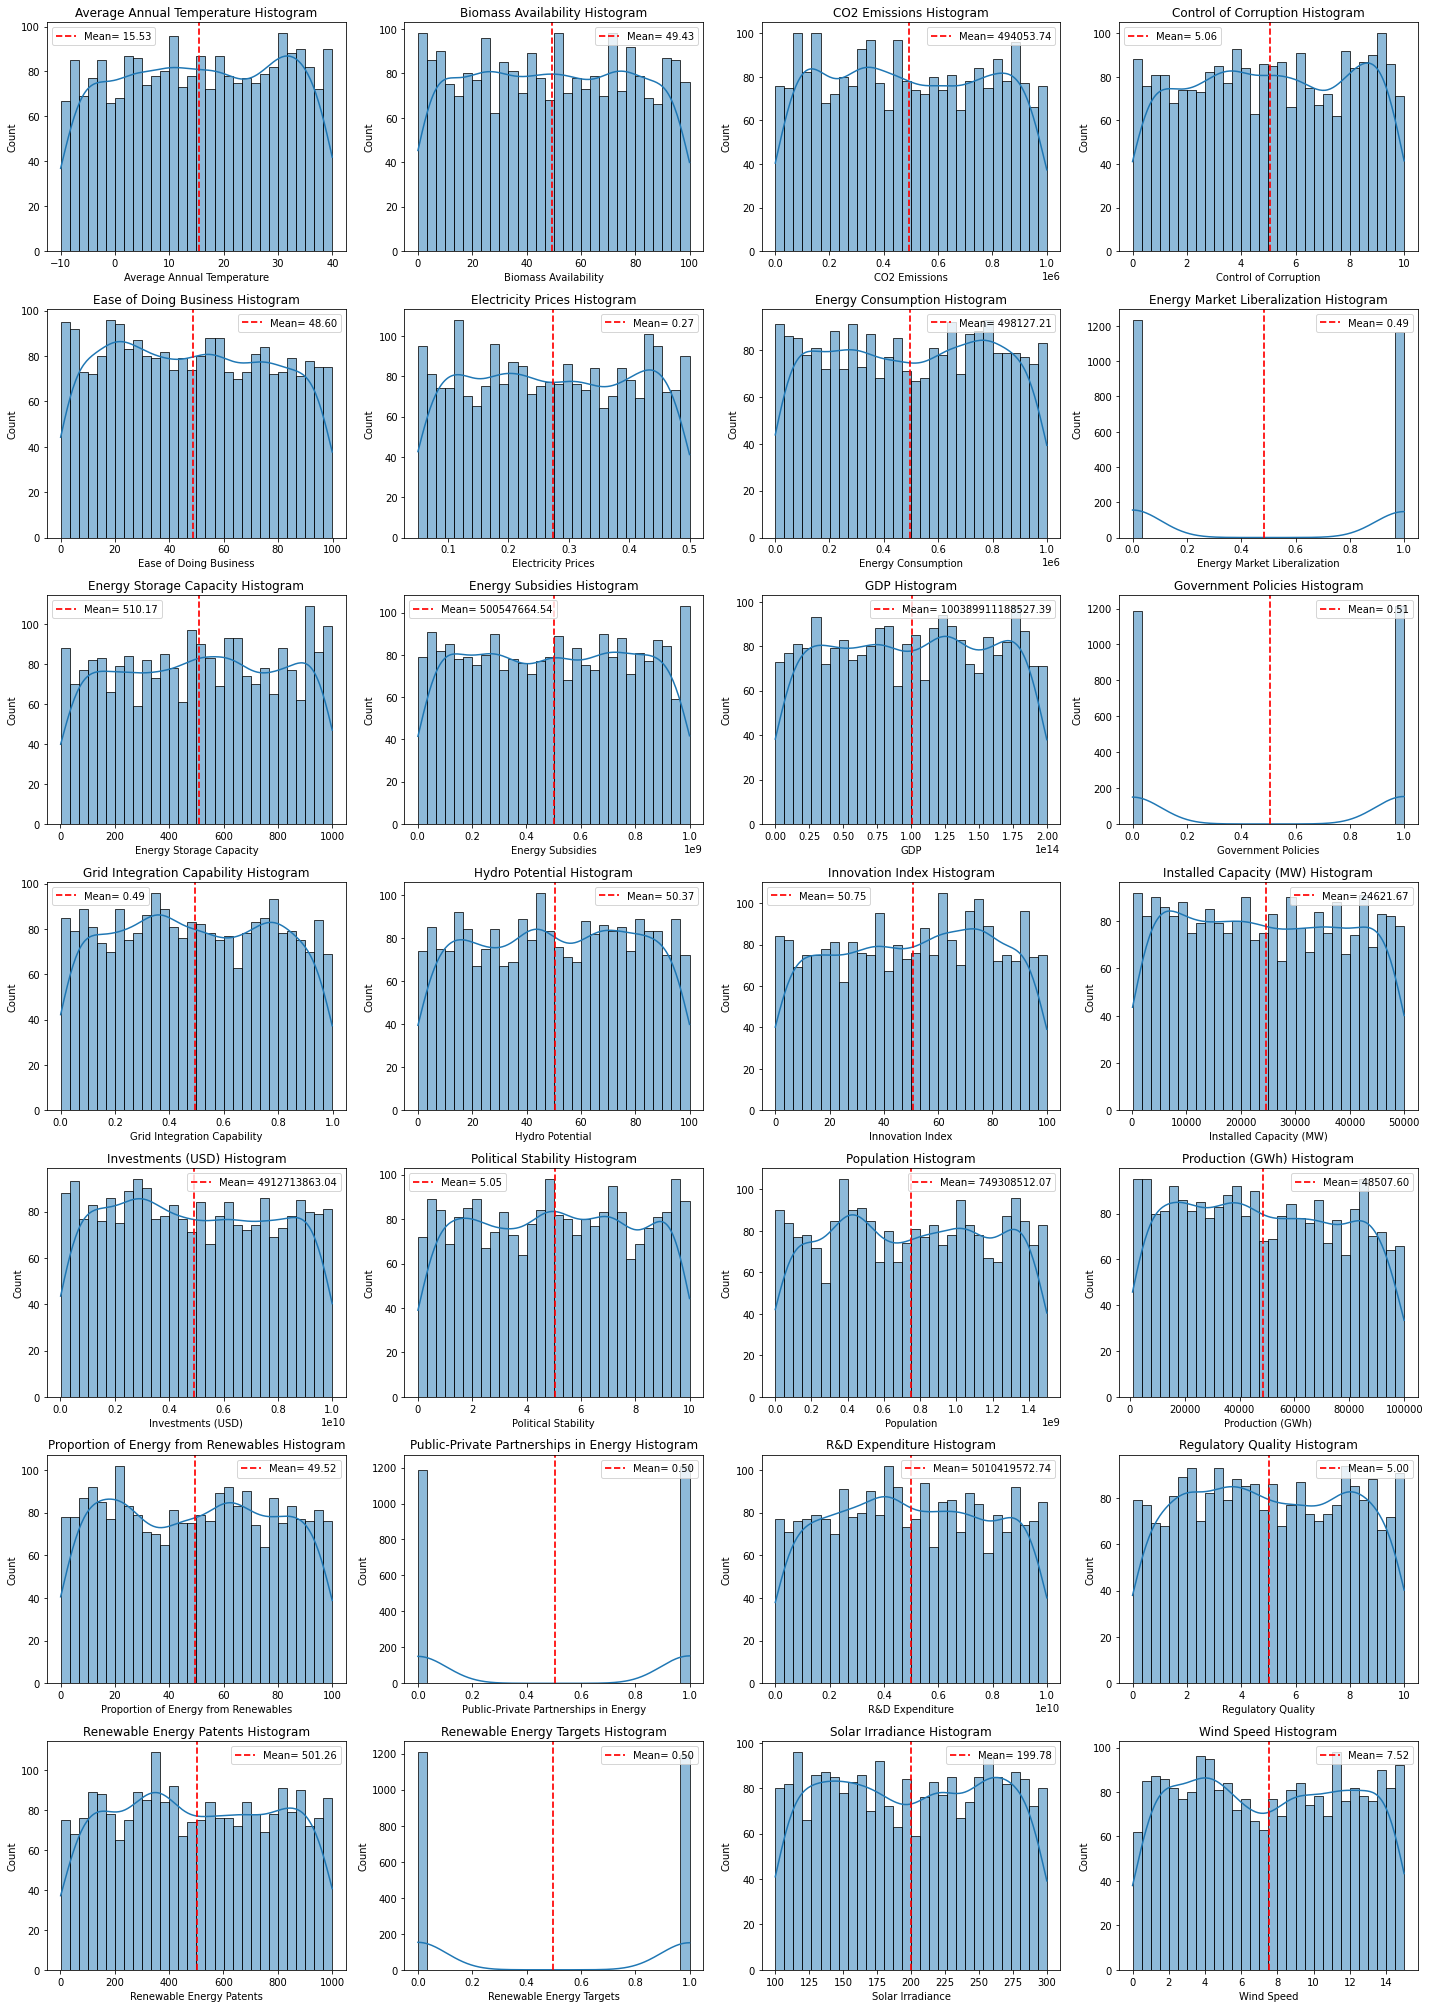

In [101]:
num_df = train_df_copy.select_dtypes(include = ['int64', 'float64']).columns.difference(['Year'])
num_df = train_df_copy.loc[:, num_df]

n_cols = 4
n_rows = (len(num_df.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize= (5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(num_df.columns):
    sns.histplot(data= num_df, 
                 x= col, 
                 kde= True,
                 bins= 30,
                 ax= axes[i])
    axes[i].set_title(f"{col} Histogram")
    
    mean_val= num_df[col].mean()
    axes[i].axvline(mean_val, color= 'red', linestyle= '--', linewidth= 1.7, label = f"Mean= {mean_val:.2f}")
    axes[i].legend() 


plt.tight_layout()
plt.show()

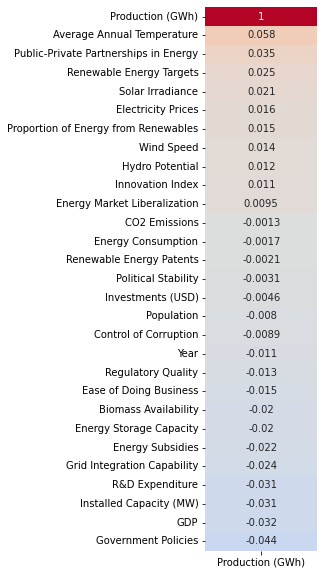

In [107]:
# Correlation Analysis

pd.set_option("display.float_format", "{:.3f}".format)

(
    train_df_copy
    .corr(numeric_only= True)[['Production (GWh)']]
    .sort_values(by= 'Production (GWh)', ascending= False)
    .pipe(
        lambda df:
        (   plt.figure(figsize= (2,10)),
            sns.heatmap(data= df,
                        annot= True,
                        cmap= 'coolwarm',
                        vmin= -0.3, vmax= 0.3,
                        cbar= False)
        )
    )
)

plt.show()

In [108]:
# Muticollinearity Analysis
(
    train_df_copy
    .drop(columns= ['Production (GWh)'])
    .select_dtypes(['float64', 'int64'])
    .pipe(
        lambda df: pd.DataFrame(
            {
                "Feature": df.columns,
                "VIF": [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
            }
        )
    )
    .sort_values('VIF', ascending= False)
)

,Feature,VIF
3,Energy Consumption,1.017
10,Renewable Energy Patents,1.016
13,Population,1.015
26,Hydro Potential,1.014
7,Energy Subsidies,1.014
19,Regulatory Quality,1.014
15,Renewable Energy Targets,1.014
17,Energy Market Liberalization,1.014
16,Public-Private Partnerships in Energy,1.013
20,Political Stability,1.013


The VIF analysis shows no evidence of multicollinearity among the explanatory variables as all values are close to 1. This indicates that each feature provides independent information, and no feature removal due to multicollinearity is required at this stage.

#### Feature Engineering

In [109]:
# Clean column names

train_df_copy.columns = train_df_copy.columns.map(lambda x: x.lower().replace(' ', '_'))
train_df_copy.head()

,country,year,energy_type,production_(gwh),installed_capacity_(mw),investments_(usd),energy_consumption,energy_storage_capacity,grid_integration_capability,electricity_prices,...,ease_of_doing_business,regulatory_quality,political_stability,control_of_corruption,co2_emissions,average_annual_temperature,solar_irradiance,wind_speed,hydro_potential,biomass_availability
0,Canada,2012,Hydro,99925.061,26824.444,3439819648.000,743320.095,523.227,0.758,0.136,...,8.446,0.838,3.119,0.513,387603.458,4.366,230.046,8.339,23.548,15.208
1,Brazil,2016,Solar,89553.347,5021.215,230691116.500,755329.781,595.365,0.336,0.115,...,15.287,0.424,7.687,7.117,764702.084,-7.236,101.633,2.755,93.221,64.559
2,France,2002,Hydro,18200.049,33611.581,7337585412.000,302879.870,423.230,0.345,0.108,...,42.582,5.799,3.199,1.185,74699.236,11.159,188.694,12.030,24.638,56.524
3,Brazil,2014,Solar,82593.101,30016.236,4158375371.394,273895.437,35.006,0.425,0.195,...,54.425,7.493,3.508,1.282,87442.613,14.800,132.899,4.776,66.962,13.434
4,Australia,2015,Biomass,15042.900,12148.925,9426153986.000,465093.510,874.578,0.610,0.166,...,97.264,5.900,4.895,4.134,627278.816,31.289,210.524,3.116,36.359,41.679


##### + Feature Engineering on categorical variables

In [110]:
# Feature Engineering on categorical variables
train_df_copy.select_dtypes(include= ['category']).head()

,country,energy_type
0,Canada,Hydro
1,Brazil,Solar
2,France,Hydro
3,Brazil,Solar
4,Australia,Biomass


In [111]:
# Dummy variables for country and Energy Type

train_df_copy = pd.get_dummies(train_df_copy,
                               columns= ['country', 'energy_type'],
                               drop_first= True)

train_df_copy.head()

,year,production_(gwh),installed_capacity_(mw),investments_(usd),energy_consumption,energy_storage_capacity,grid_integration_capability,electricity_prices,energy_subsidies,proportion_of_energy_from_renewables,...,country_Germany,country_India,country_Japan,country_Russia,country_UK,country_USA,energy_type_Geothermal,energy_type_Hydro,energy_type_Solar,energy_type_Wind
0,2012,99925.061,26824.444,3439819648.000,743320.095,523.227,0.758,0.136,345335368.700,96.685,...,False,False,False,False,False,False,False,True,False,False
1,2016,89553.347,5021.215,230691116.500,755329.781,595.365,0.336,0.115,518123314.400,83.430,...,False,False,False,False,False,False,False,False,True,False
2,2002,18200.049,33611.581,7337585412.000,302879.870,423.230,0.345,0.108,844838068.900,50.653,...,False,False,False,False,False,False,False,True,False,False
3,2014,82593.101,30016.236,4158375371.394,273895.437,35.006,0.425,0.195,366810840.037,29.756,...,False,False,False,False,False,False,False,False,True,False
4,2015,15042.900,12148.925,9426153986.000,465093.510,874.578,0.610,0.166,726199983.900,71.527,...,False,False,False,False,False,False,False,False,False,False


#### Modeling

In [112]:
# Define explanatory and response variables
X = train_df_copy.drop("production_(gwh)", axis= 1)
y = train_df_copy['production_(gwh)']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [113]:
# Define models
models = {
    "Baseline (Mean)": DummyRegressor(strategy= "mean"),
    "Linear Regression": make_pipeline(StandardScaler(), LinearRegression()),
    "Ridge Regression": make_pipeline(StandardScaler(), Ridge(alpha= 1.0)),
    "Random Forest": RandomForestRegressor(n_estimators= 200, random_state= 42),
    "Gradient Boosting": GradientBoostingRegressor(random_state= 42),
    "XGBoost": XGBRegressor(random_state= 42, verbosity= 0)
}

# Define metrics
scoring = {
    "R2": make_scorer(r2_score),
    "MAE": make_scorer(mean_absolute_error, greater_is_better= False),
    "RMSE": make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred, squared= False), greater_is_better= False)
}

# Cross-validation setup
cv = KFold(n_splits= 5, shuffle= True, random_state= 42)


# Evaluate models
results= []

for name, model in models.items():
    scores = {}
    for metric_name, scorer in scoring.items():
        cv_scores = cross_val_score(model, X, y.values.ravel(), cv= cv, scoring= scorer)
        scores[metric_name] = np.mean(np.abs(cv_scores))
        scores[metric_name + "_std"] = np.std(np.abs(cv_scores))
    results.append({"Model": name, **scores})

results_df = pd.DataFrame(results).sort_values("R2", ascending= False).reset_index(drop= True)
results_df

,Model,R2,R2_std,MAE,MAE_std,RMSE,RMSE_std
0,XGBoost,0.230,0.027,26648.392,664.433,31578.637,617.050
1,Gradient Boosting,0.069,0.012,25271.401,214.556,29431.360,321.026
2,Linear Regression,0.027,0.009,24900.158,351.886,28856.953,385.350
3,Ridge Regression,0.027,0.009,24899.863,351.840,28856.492,385.342
4,Random Forest,0.026,0.010,24860.308,260.325,28838.824,271.514
5,Baseline (Mean),0.000,0.000,24662.517,384.799,28475.453,360.041


Although multicolinearity was demonstrated to be inexistent among the independent variables, a Ridge Regression model will also be evaluated for verifying purposes.

Next:

+ Feature Engineering
+ Scaling and Normalisation
+ Check for data leakage
+ Train and test the model
+ XAI
+ Predictions